In [1]:
import matplotlib.pyplot as plt
import numpy as np

from importlib import reload
from matplotlib import rc
from neurobiases import (TriangularModel,
                         EMSolver,
                         TCSolver,
                         solver_utils,
                         plot)

%matplotlib inline

In [31]:
tuning_kwargs, coupling_kwargs, noise_kwargs, stim_kwargs = \
    TriangularModel.generate_kwargs(
        parameter_design='direct_response',
        M=10, N=15, K=2, corr_cluster=0.4, corr_back=0.1,
        coupling_sum=0.0,
        tuning_sparsity=0.5, coupling_sparsity=0.5,
        tuning_random_state=2332, coupling_random_state=2332)

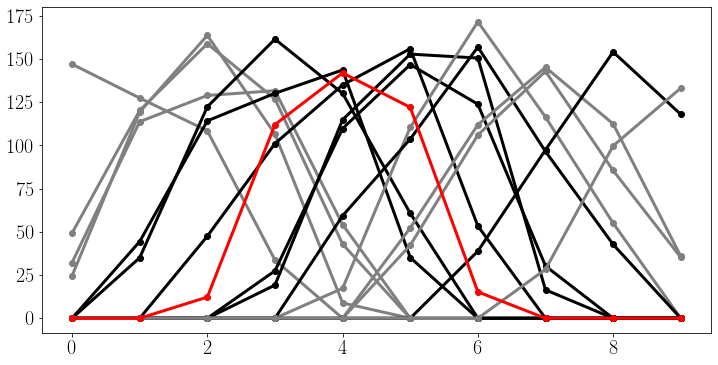

In [32]:
tm = TriangularModel(
    model='linear',
    parameter_design='direct_response',
    tuning_kwargs=tuning_kwargs,
    coupling_kwargs=coupling_kwargs,
    noise_kwargs=noise_kwargs,
    stim_kwargs=stim_kwargs)
tm.plot_tuning_curves(neuron='all')
plt.show()

In [33]:
tm.a.ravel()

array([ 0.        ,  0.        ,  0.        ,  0.        , -0.28041263,
       -0.02728839, -0.50207492,  0.02490093,  0.42495295,  0.        ,
        0.52124302,  0.        ,  0.        , -0.16132095,  0.        ])

In [34]:
X, Y, y = tm.generate_samples(n_samples=1000, random_state=2332)

In [35]:
solver = EMSolver(
    X, Y, y, K=1,
    solver='ow_lbfgs',
    max_iter=20,
    tol=0,
    c_coupling=1e-4,
    c_tuning=1e-4,
    initialization='fits'
)

In [36]:
solver_mask = EMSolver(
    X, Y, y, K=1,
    solver='ow_lbfgs',
    max_iter=20,
    tol=0,
    c_coupling=1e-4,
    c_tuning=1e-4,
    initialization='fits',
    a_mask=tm.a.ravel() != 0,
    b_mask=tm.b.ravel() != 0,
    B_mask=tm.B != 0
)

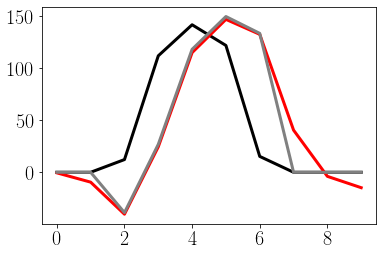

In [37]:
plt.plot(tm.b.ravel(), color='k', linewidth=3)
plt.plot(solver.b.ravel(), color='r', linewidth=3)
plt.plot(solver_mask.b.ravel(), color='gray', linewidth=3)

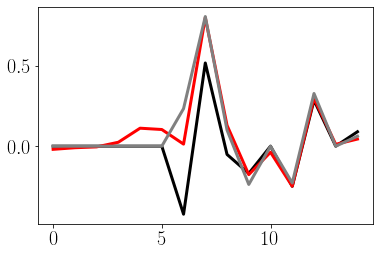

In [8]:
plt.plot(tm.a.ravel(), color='k', linewidth=3)
plt.plot(solver.a.ravel(), color='r', linewidth=3)
plt.plot(solver_mask.a.ravel(), color='gray', linewidth=3)

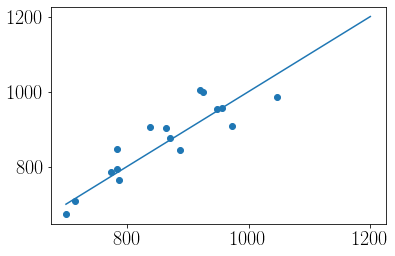

In [45]:
plt.scatter(solver.Psi_tr_to_Psi(), tm.Psi)
plt.plot([700, 1200], [700, 1200])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import FactorAnalysis

In [ ]:
fitter = LinearRegression(fit_intercept=False)

In [ ]:
fitter.fit(Y, y.ravel()).coef_

In [ ]:
solver.Psi_to_Psi_tr(tm.Psi)

In [ ]:
solver.Psi_tr

In [ ]:
plt.plot(solver.B[:, 0])

In [ ]:
Z = np.concatenate((X, Y), axis=1)
fitter.fit(Z, y.ravel())

In [ ]:
fitter.coef_

In [46]:
residuals = y - fitter.predict(Z)

NameError: name 'fitter' is not defined

In [47]:
fa = FactorAnalysis(n_components=1)

NameError: name 'FactorAnalysis' is not defined

In [ ]:
fa.fit(np.concatenate((y, Y), axis=1))

In [ ]:
fa.components_

In [48]:
solver.L.shape

(1, 16)

In [40]:
solver_mask.fit_em(verbose=True)

Initial marginal likelihood: -89542.724792
Iteration 1, del=0.293207307, mll=-63288.143612
Iteration 2, del=0.000088793, mll=-63282.524070
Iteration 3, del=0.000001251, mll=-63282.444923
Iteration 4, del=0.000000000, mll=-63282.444923


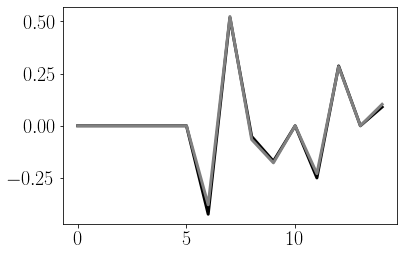

In [41]:
plt.plot(tm.a.ravel(), color='k', linewidth=3)
plt.plot(solver_mask.a.ravel(), color='gray', linewidth=3)

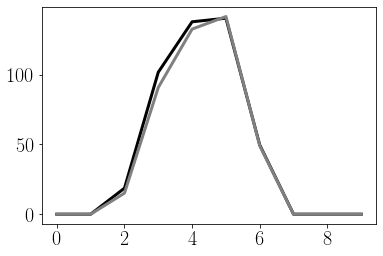

In [42]:
plt.plot(tm.b.ravel(), color='k', linewidth=3)
plt.plot(solver_mask.b.ravel(), color='gray', linewidth=3)